<a href="https://colab.research.google.com/github/oleksandr-maksymikhin/20211106_Struct_Enum_Product_request/blob/master/AI_2_Recitation_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I: Logistic Regression


![newsgroups_minimality_not_normalized.png](data: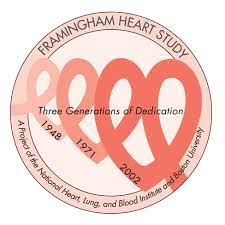)


# Introduction

### Task Description

The **World Health Organization (WHO)** estimates that 12 million people die annually due to heart disease. In the United States and other developed nations, cardiovascular diseases account for fifty percent of all deaths. The early prognosis of cardiovascular disease might help high-risk individuals make decisions regarding lifestyle adjustments, thereby reducing medical problems. This study aims to identify the most significant heart disease risk variables and forecast the overall risk using logistic regression.

### **Pipeline**:
1. Exploration of the Dataset. Load the .csv and visualize the structure of it.
2. Define a Simple Classifier. Then we will build a simple classifer for predicting the 10 year risk of coronary heart disease (CHD). This will be the baseline.
3. Data Exploration. Let's now train a model. The first step is to prepare the data used by the training algorithm.
4. Training. Define the Logistic Regression Model and train it.
5. Evaluate the classifier.
6. Visualise the results.


### Dataset
The dataset is accessible to the public on the Kaggle website and comes from an ongoing cardiovascular research of Framingham, Massachusetts people. The objective of classification is to determine whether a patient has a 10-year risk of developing coronary heart disease (CHD). The dataset contains information on patients. It has 3,658 records and 16 attribute. Each attribute is a possible risk factor. There are both demographic and behavioral risk factors, as well as medical ones.

#### **Attributes**:

* **Demographic**:
    * Sex: male or female (Nominal)
    * Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
    * Education: no further information provided

    
* **Behavioral**:
    * Current Smoker: whether or not the patient is a current smoker (Nominal)
    * Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
* **Information on medical history**:
    * BP Meds: whether or not the patient was on blood pressure medication (Nominal)
    * Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
    * Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
    * Diabetes: whether or not the patient had diabetes (Nominal)


* **Information on current medical condition**:
    * Tot Chol: total cholesterol level (Continuous)
    * Sys BP: systolic blood pressure (Continuous)
    * Dia BP: diastolic blood pressure (Continuous)
    * BMI: Body Mass Index (Continuous)
    * Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
    * Glucose: glucose level (Continuous)


* **Target variable to predict**:
    * 10 year risk of coronary heart disease (CHD) - (binary: “1”, means “Yes”, “0” means “No”)


### Step 1: Data Exploration
Navigate to the directory containing the file containing the data: framingham.csv

#### Load the Data

In [ ]:
import pandas as pd
framingham = pd.read_csv("framingham.csv") # load the dataset

In [ ]:
framingham.head() # using the method head

,Unnamed: 0,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,2,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,3,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,4,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,5,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


How many patients experienced CHD within 10 years of the first exam? Use the hist function.

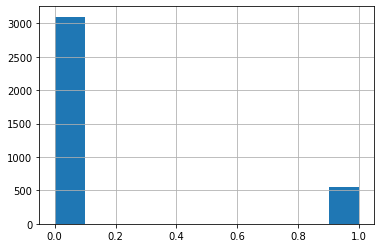

In [ ]:
framingham["TenYearCHD"].hist()

<ipython-input-5-53220807bbce>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  framingham.hist(ax = ax)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffaabc54b80>,
      dtype=object)

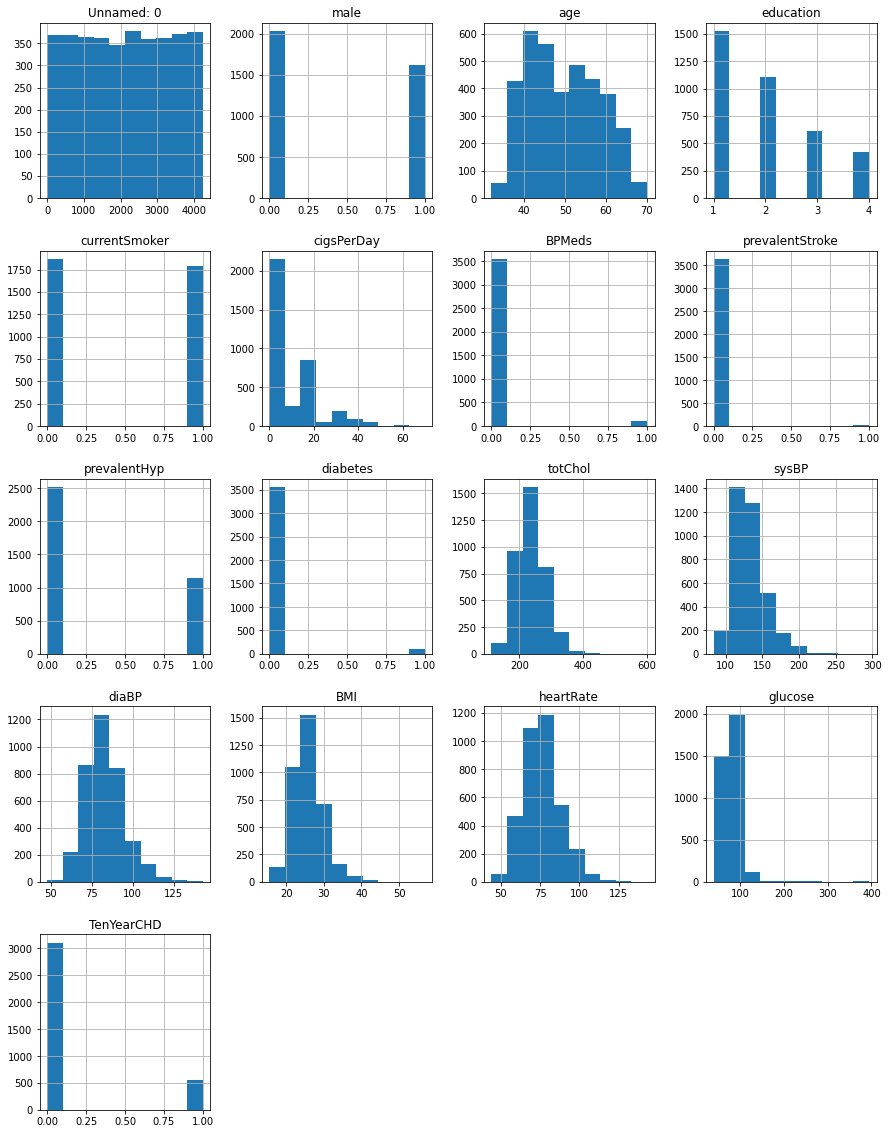

In [ ]:
import matplotlib.pyplot as plt
# checking distributions using histograms
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
framingham.hist(ax = ax)

### Simple Clssifier

The vast majority did not experience CHD. Simple baseline method - **always predict 0**!


Accuracy:

In [ ]:
3101/(3101+557)

0.8477310005467469

*This* is what we will compare the accuracy of our models to. For linear regression, a simple baseline is built into **R-squared**.

In some applications, a more intelligent baseline method is better. How about if we predict 1 (CHD) if the person is currently hypertensive, and predict 0 otherwise?

We'll see how well this does using a 2D table!

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(framingham["TenYearCHD"], framingham["prevalentHyp"])

array([[2245,  856],
       [ 273,  284]])

In [ ]:
(2245+284)/(2245+856+273+284)

0.6913613996719519

shortcut

In [ ]:
(2245+284)/len(framingham)

0.6913613996719519

#### Can other attributes predict this index more precisely?

- male 0.5718972115910333
- currentSmoker 0.5144887916894478
- BPMeds 0.8376161837069437
- prevalentStroke 0.846364133406233
- prevalentHyp 0.6913613996719519
- diabetes 0.839803171131766

### Data Processing
Now, let's split our data into a training set and a testing set using train_test_spit.
Why is it important to have a training set and a testing set?


Set our seed (random state) so we all get the same split!


You typically want to put somewhere between **50%** and **80%** of the data in the training set.


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(framingham, test_size=0.35, random_state=88)

In [ ]:
import statsmodels.api as sm

framinghamLog = sm.formula.glm("TenYearCHD ~ male + age + education + currentSmoker + cigsPerDay + BPMeds + prevalentStroke + prevalentHyp + diabetes + totChol + sysBP + diaBP + BMI + heartRate + glucose",
                       family=sm.families.Binomial(),
                       data=train).fit()
print(framinghamLog.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             TenYearCHD   No. Observations:                 2377
Model:                            GLM   Df Residuals:                     2361
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -906.78
Date:                Sat, 28 Jan 2023   Deviance:                       1813.6
Time:                        10:23:57   Pearson chi2:                 2.36e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -6.9052      0.869     

### Test

Now, lets use this model to make predictions on our test set:

In [ ]:
predictTestProbs = framinghamLog.predict(test)
predictTest = [0 if i <0.5 else 1 for i in predictTestProbs]

In [ ]:
confusion_matrix(test["TenYearCHD"].tolist(), predictTest)

array([[1079,   10],
       [ 169,   23]])

With a threshold of 0.5, we predict an outcome of 1 very rarely. This means that our model rarely predicts a Ten Year CHD risk above 50%.

What is our accuracy?

In [ ]:
(1079+23)/(1079+10+169+23)

0.8602654176424668

Shortcut

In [ ]:
(1079+23)/len(predictTest)

0.8602654176424668

So our model barely beats the baseline. But do we still have a valuable model by varying the threshold? Let's create an ROC curve for the test set.

### ROC Curve

So our model barely beats the baseline. But do we still have a valuable model by varying the threshold?

#### What ROC Curve shows?

A Receiver Operating Characteristic (ROC) curve is a graphical representation of the performance of a binary classifier system. The ROC curve plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

The true positive rate is the proportion of actual positive cases that are correctly identified as such (also known as sensitivity or recall). The false positive rate is the proportion of actual negative cases that are incorrectly identified as positive (also known as the fall-out).

The ROC curve shows the trade-off between the true positive rate and the false positive rate for different threshold settings of a binary classifier. A classifier that makes no mistakes will have a ROC curve that passes through the upper left corner of the plot (i.e., an AUC of 1), whereas a classifier that is no better than random guessing will have a ROC curve that is a diagonal line (i.e., an AUC of 0.5).

ROC curve is a powerful tool to evaluate the performance of a classifier, as it shows the trade-off between the true positive rate and the false positive rate, and it allows us to visualize the performance of the classifier across a range of threshold settings.



Let's create an ROC curve for the test set.

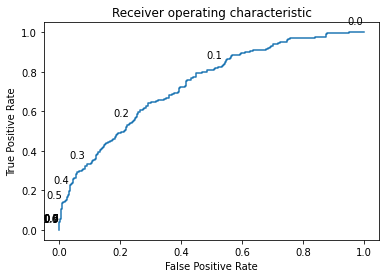

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(test["TenYearCHD"].tolist(),  predictTestProbs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

# Add cutoffs
cutoffs = np.arange(0,1.1,0.1)
for c in cutoffs:
    plt.annotate('%.1f' % c, (fpr[thresholds > c][-1], tpr[thresholds > c][-1]), textcoords='offset points', xytext=(-8,8), ha='center', fontsize=10)
plt.show()

It looks like we do have a good model!

Let's compute the out-of-sample AUC.


In [ ]:
roc_auc_score(test["TenYearCHD"].tolist(),  predictTestProbs)

0.736192416590144

We have an AUC of 73% on our test set, which means that the model can differentiate between low-risk and high-risk patients pretty well.

# Part II: Linear Regression

In [ ]:
import pandas as pd
# Read in the data file, make sure to upload the data files to the content
# folder before you proceed.
wine = pd.read_csv("wine.csv")

In [ ]:
# Look at the structure of the data:
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         25 non-null     int64  
 1   Price        25 non-null     float64
 2   WinterRain   25 non-null     int64  
 3   AGST         25 non-null     float64
 4   HarvestRain  25 non-null     int64  
 5   Age          25 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 1.3 KB
None


In [ ]:
# Look at a statistical summary of the data:
print(wine.describe())

              Year      Price  WinterRain       AGST  HarvestRain        Age
count    25.000000  25.000000   25.000000  25.000000    25.000000  25.000000
mean   1965.800000   7.067224  605.280000  16.509336   148.560000  17.200000
std       7.691987   0.650341  132.277965   0.675397    74.419464   7.691987
min    1952.000000   6.204900  376.000000  14.983300    38.000000   5.000000
25%    1960.000000   6.518800  536.000000  16.200000    89.000000  11.000000
50%    1966.000000   7.121100  600.000000  16.533300   130.000000  17.000000
75%    1972.000000   7.495000  697.000000  17.066700   187.000000  23.000000
max    1978.000000   8.493700  830.000000  17.650000   292.000000  31.000000


In [ ]:
# BASIC DATA ANALYSIS

# Access a variable in a DataFrame:
print(wine['Year'][:5])
print(wine['WinterRain'][:5])

0    1952
1    1953
2    1955
3    1957
4    1958
Name: Year, dtype: int64
0    600
1    690
2    502
3    420
4    582
Name: WinterRain, dtype: int64


In [ ]:
# Compute the mean:
print(wine['WinterRain'].mean())

# Standard deviation:
print(wine['WinterRain'].std())

# Minimum value:
print(wine['WinterRain'].min())

605.28
132.27796490723614
376


In [ ]:
# Statistical summary:
print(wine['WinterRain'].describe())

count     25.000000
mean     605.280000
std      132.277965
min      376.000000
25%      536.000000
50%      600.000000
75%      697.000000
max      830.000000
Name: WinterRain, dtype: float64


In [ ]:
# In one year, there was only 376 mm of winter rain - which year?
print(wine['Year'][wine['WinterRain'].idxmin()])

# In another year there was 830 mm of winter rain - which year?
print(wine['Year'][wine['WinterRain'].idxmax()])

1973
1961


In [ ]:
# Sorted vector of WinterRain:
print(wine['WinterRain'].sort_values()[:5])

# Sorted vector of WinterRain in descending order:
print(wine['WinterRain'].sort_values(ascending=False)[:5])

19    376
10    402
22    418
3     420
5     485
Name: WinterRain, dtype: int64
7     830
23    821
12    819
6     763
24    763
Name: WinterRain, dtype: int64


We want to build a linear regression equation. Is there a linear relationship between WinterRain and Price? Let's take a look


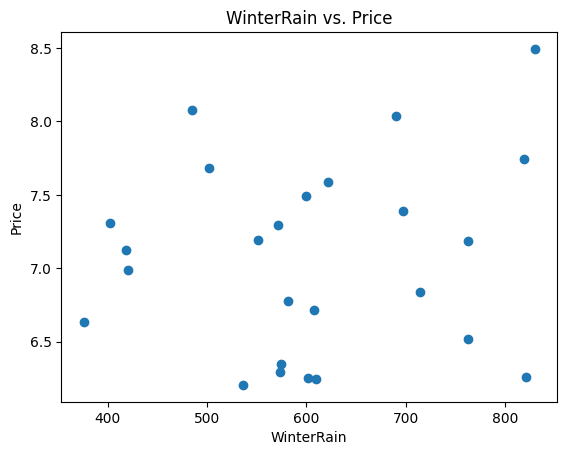

In [ ]:
import matplotlib.pyplot as plt
# Scatter plot: WinterRain vs. Price
plt.scatter(wine['WinterRain'], wine['Price'])
plt.xlabel('WinterRain')
plt.ylabel('Price')
plt.title('WinterRain vs. Price')
plt.show()

How about AGST (Average growing season temperature) and Price?

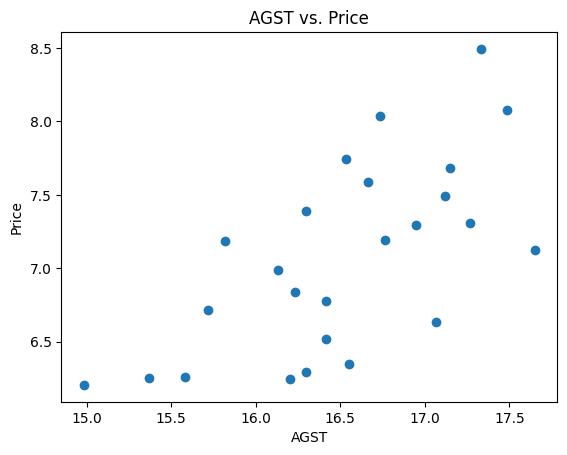

In [ ]:
# Scatter plot: AGST vs. Price
plt.scatter(wine['AGST'], wine['Price'])
plt.xlabel('AGST')
plt.ylabel('Price')
plt.title('AGST vs. Price')
plt.show()

It looks like high AGST => higher price. Not always though...let's look at the cases where the AGST is higher than average, but the price is lower than average.


In [ ]:
# Identify outliers:
mean_agst = wine['AGST'].mean()
mean_price = wine['Price'].mean()
Outliers = wine[(wine['AGST'] >= mean_agst) & (wine['Price'] <= mean_price)]
print(Outliers.head())

    Year   Price  WinterRain     AGST  HarvestRain  Age
15  1969  6.3459         575  16.5500          244   14
19  1973  6.6367         376  17.0667          123   10


In [ ]:
# Save outliers to a CSV file:
Outliers.to_csv("Outliers.csv", index=False)

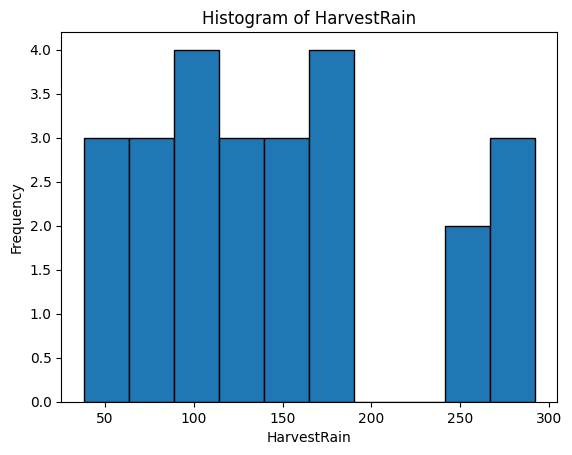

In [ ]:
# Histogram of the HarvestRain
plt.hist(wine['HarvestRain'], bins=10, edgecolor='k')
plt.xlabel('HarvestRain')
plt.ylabel('Frequency')
plt.title('Histogram of HarvestRain')
plt.show()

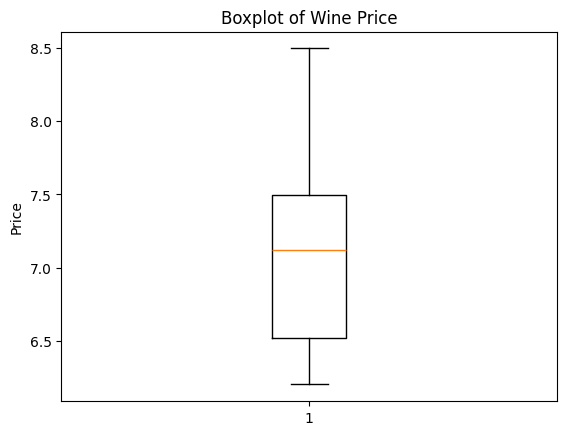

In [ ]:
# Boxplot of Price
plt.boxplot(wine['Price'])
plt.ylabel('Price')
plt.title('Boxplot of Wine Price')
plt.show()

In [ ]:
# LINEAR REGRESSION
import statsmodels.api as sm
# Define independent variables and dependent variable:
x = wine[['AGST', 'WinterRain', 'HarvestRain', 'Age']]
y = wine['Price']
x = sm.add_constant(x)  # Add a constant term for the intercept

# Fit the linear regression model:
LinearRegModel = sm.OLS(y, x).fit()

In [ ]:
# Summary of the regression model:
print(LinearRegModel.summary())

# Check for multicollinearity:
print(wine.corr())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     24.17
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           2.04e-07
Time:                        15:24:26   Log-Likelihood:                -2.1622
No. Observations:                  25   AIC:                             14.32
Df Residuals:                      20   BIC:                             20.42
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.4300      1.766     -1.942      

## **How can we interpret these outputs?**
- Coefficients: In linear regression, the coefficients are unknown constants that represent the intercept and ???regression" terms in the linear model.


- Coefficient - Estimate: The beta coefficients of the model including the intercept and the regression terms


- Coefficient - Standard Error: The coefficient Standard Error measures the average amount that the coefficient estimates vary from the actual average value of our response variable. We ideally want a lower number relative to its coefficients. The Standard Error can be used to compute an estimate of the expected difference in case we ran the model again and again.


- Coefficient - t value: The coefficient t-value is a measure of how many standard deviations our coefficient estimate is far away from 0. We want it to be far away from zero as this would indicate we could reject the null hypothesis - that is, we could declare a relationship between price and the rest of the covariates exist. In our example, the t-values are also used to compute p-values.


- Coefficient - Pr(>t): The Pr(>t) acronym found in the model output relates to the probability of observing any value equal or larger than t. A small p-value indicates that it is unlikely we will observe a relationship between the predictor and response variables due to chance. Typically, a p-value of 5% or less is a good cut-off point. Note the ???signif. Codes??? associated to each estimate. Three stars (or asterisks) represent a highly significant p-value.

- The R^2 statistic: The R-squared (R^2) statistic provides a measure of how well the model is fitting the actual data. It takes the form of a proportion of variance. R^2 is a measure of the linear relationship between our predictor variable and our response / target variable. It always lies between 0 and 1 (i.e.: a number near 0 represents a regression that does not explain the variance in the response variable well and a number close to 1 does explain the observed variance in the response variable).


In [ ]:
# Let's see how well our model does at predicting new data.
wineTest = pd.read_csv("wineTest.csv")
print(wineTest.info())

# Make predictions using the model:
predictTest = LinearRegModel.predict(sm.add_constant(wineTest[['AGST', 'WinterRain', 'HarvestRain', 'Age']]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         2 non-null      int64  
 1   Price        2 non-null      float64
 2   WinterRain   2 non-null      int64  
 3   AGST         2 non-null      float64
 4   HarvestRain  2 non-null      int64  
 5   Age          2 non-null      int64  
dtypes: float64(2), int64(4)
memory usage: 224.0 bytes
None


In [ ]:
import numpy as np
# Compute R-squared on the test set:
SSE = np.sum((predictTest - wineTest['Price'])**2)
SST = np.sum((wine['Price'].mean() - wineTest['Price'])**2)
r2 = 1 - SSE / SST
print(r2)

0.7944277602631844
